0    11/01/2015 00:00:00
1    11/01/2015 01:00:00
2    11/01/2015 02:00:00
3    11/01/2015 03:00:00
4    11/01/2015 04:00:00
Name: DateTime, dtype: object
0    04/01/2006 00:00:00
1    04/01/2006 01:00:00
2    04/01/2006 02:00:00
3    04/01/2006 03:00:00
4    04/01/2006 04:00:00
Name: DateTime, dtype: object
              DateTime  Junction  Vehicles           ID Summary Precip Type  \
0  11/01/2015 00:00:00         1        15  20151101001   Foggy        rain   
1  11/01/2015 00:00:00         2         6  20151101002   Foggy        rain   
2  11/01/2015 00:00:00         3         9  20151101003   Foggy        rain   
3  11/01/2015 01:00:00         1        13  20151101011   Foggy        rain   
4  11/01/2015 01:00:00         2         6  20151101012   Foggy        rain   

   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         0.577778                  0.577778      0.96             3.2200   
1         0.577778                  0.577778      0.96       

C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1318865309.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1318865309.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]


Epoch 1/5
138/138 [==============================] - 13s 52ms/step - loss: 1997.0587 - val_loss: 1298.9125
Epoch 2/5
138/138 [==============================] - 3s 23ms/step - loss: 593.8865 - val_loss: 866.7079
Epoch 3/5
138/138 [==============================] - 13s 93ms/step - loss: 504.8275 - val_loss: 686.1391
Epoch 4/5
138/138 [==============================] - 3s 21ms/step - loss: 473.3723 - val_loss: 676.8788
Epoch 5/5
824/824 [==============================] - 7s 8ms/step - loss: 658.2769
Mean Squared Error: 658.2769165039062
824/824 [==============================] - 4s 4ms/step


C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1318865309.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Speed'] = model.predict(X_test_scaled)


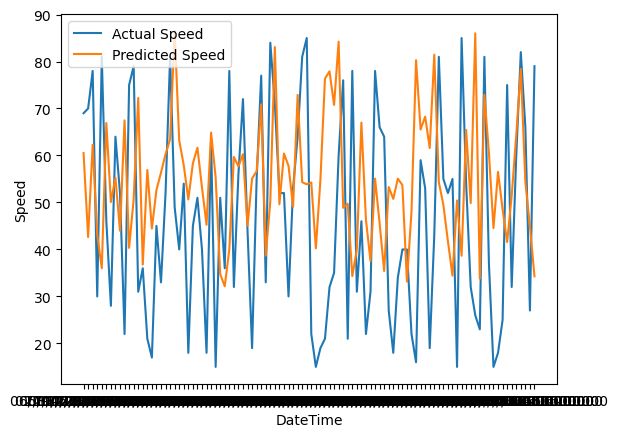

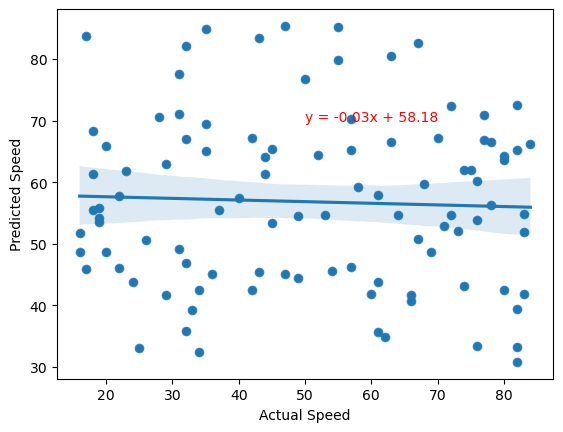

In [16]:
#linear regression model
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the datasets
traffic_df = pd.read_csv('traffic.csv')
weather_df = pd.read_csv('weatherHistory.csv')
from datetime import datetime

weather_df = weather_df.rename(columns={'Formatted Date': 'DateTime'})

# Convert the DateTime columns in both dataframes to datetime objects
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f %z')

# Convert the DateTime columns in both dataframes to the same format
traffic_df['DateTime'] = traffic_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))
weather_df['DateTime'] = weather_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))

print(traffic_df['DateTime'].head())
print(weather_df['DateTime'].head())


from datetime import datetime
import pandas as pd


# Merge the datasets based on the DateTime column
merged_df = pd.merge(traffic_df, weather_df, on='DateTime')

# Split the data into training and testing sets based on year in DateTime column
train_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2015]
test_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2016]

print(train_data.head())
print(test_data.head())

import random

train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]

X_train = train_data[['Junction', 'Vehicles', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_train = train_data['Speed']
X_test = test_data[['Junction', 'Vehicles', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_test = test_data['Speed']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=5, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)

print("Mean Squared Error:", mse)

# Make predictions on test data
test_data['Predicted_Speed'] = model.predict(X_test_scaled)

import matplotlib.pyplot as plt
import random

# Select a random sample of 100 data points
random_indices = random.sample(range(len(test_data)), 100)
sample_test_data = test_data.iloc[random_indices]

# Plot the actual and predicted speeds for the sample data
plt.plot(sample_test_data['DateTime'], sample_test_data['Speed'], label='Actual Speed')
plt.plot(sample_test_data['DateTime'], sample_test_data['Predicted_Speed'], label='Predicted Speed')
plt.xlabel('DateTime')
plt.ylabel('Speed')
plt.legend()
plt.show()


import seaborn as sns
from sklearn.metrics import r2_score

# Randomly sample 50 data points from the test data
sample_test_data = test_data.sample(n=100)

# Create a scatter plot of actual vs predicted speeds
sns.scatterplot(x='Speed', y='Predicted_Speed', data=sample_test_data)

# Add a linear regression line of best fit to the scatter plot
sns.regplot(x='Speed', y='Predicted_Speed', data=sample_test_data)

# Calculate the R-squared value
r_squared = r2_score(sample_test_data['Speed'], sample_test_data['Predicted_Speed'])



# Calculate the coefficients of the line of best fit
coefficients = np.polyfit(sample_test_data['Speed'], sample_test_data['Predicted_Speed'], 1)
m = coefficients[0]
b = coefficients[1]

# Add the line of best fit equation to the plot
plt.text(x=50, y=70, s=f'y = {m:.2f}x + {b:.2f}', color='red')

plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.show()





C:\Users\lefty\AppData\Local\Temp\ipykernel_22768\3038117775.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
C:\Users\lefty\AppData\Local\Temp\ipykernel_22768\3038117775.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]
C:\Users\lefty\AppData\Local\Temp\ipykernel_22768\3038117775.py:37: SettingWithCopyWarning: 
A value is trying to be set on a co

Accuracy: 0.49533242258652094
Confusion Matrix:
 [[7915 4904]
 [8395 5138]]


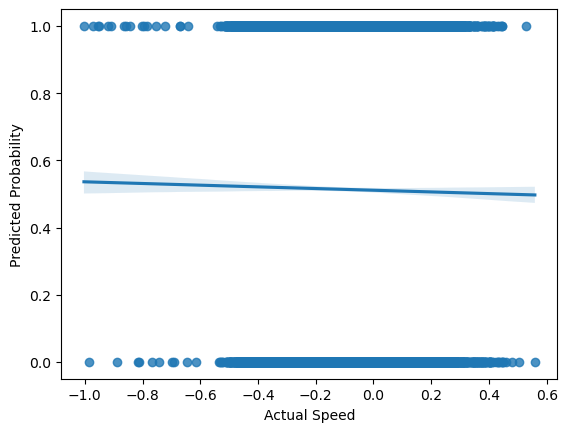

In [20]:
#logistic regression model
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
traffic_df = pd.read_csv('traffic.csv')
weather_df = pd.read_csv('weatherHistory.csv')
from datetime import datetime

weather_df = weather_df.rename(columns={'Formatted Date': 'DateTime'})

# Convert the DateTime columns in both dataframes to datetime objects
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f %z')

# Convert the DateTime columns in both dataframes to the same format
traffic_df['DateTime'] = traffic_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))
weather_df['DateTime'] = weather_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))

# Merge the datasets based on the DateTime column
merged_df = pd.merge(traffic_df, weather_df, on='DateTime')

# Split the data into training and testing sets based on year in DateTime column
train_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2015]
test_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2016]
import random

train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]

# Convert speeds to binary categories
train_data['Speed_Category'] = np.where(train_data['Speed'] >= 50, 1, 0)
test_data['Speed_Category'] = np.where(test_data['Speed'] >= 50, 1, 0)

X_train = train_data[['Junction', 'Vehicles', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_train = train_data['Speed_Category']
X_test = test_data[['Junction', 'Vehicles', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_test = test_data['Speed_Category']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on test data
test_data['Predicted_Speed_Category'] = model.predict(X_test_scaled)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(test_data['Speed_Category'], test_data['Predicted_Speed_Category'])
confusion_mat = confusion_matrix(test_data['Speed_Category'], test_data['Predicted_Speed_Category'])

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

# Plot the logistic regression
sns.regplot(x=np.dot(X_test_scaled, model.coef_.T), y=test_data['Speed_Category'], logistic=True)

# Add x and y labels to the plot
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Probability')

# Show the plot
plt.show()


C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1860695839.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1860695839.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]


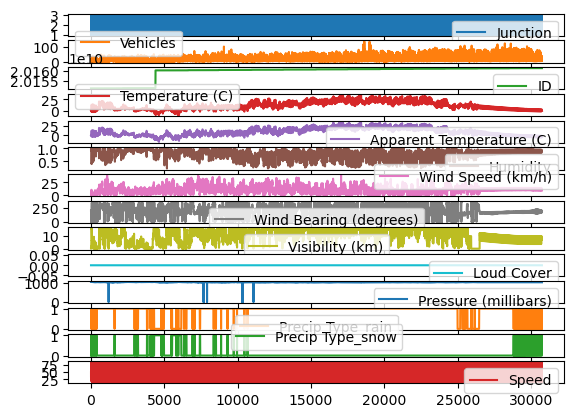

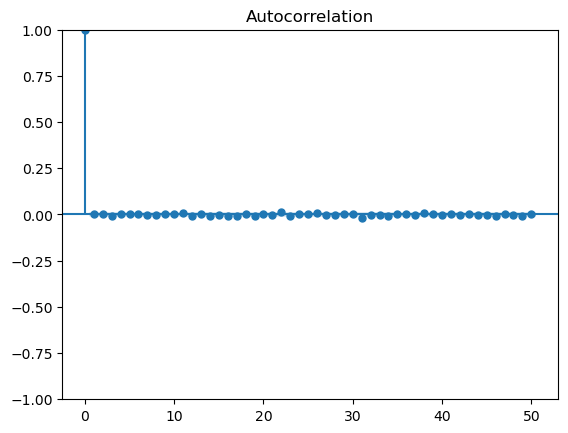

C:\Users\lefty\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


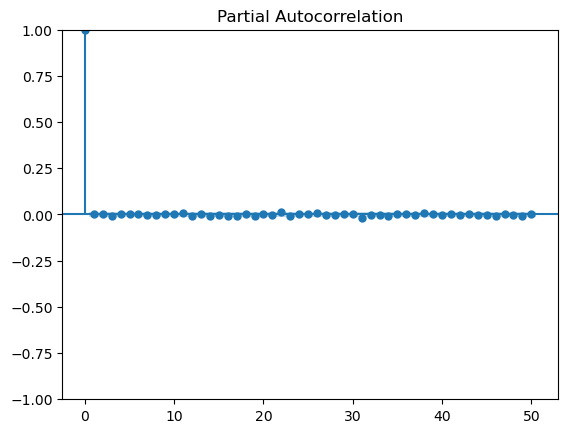

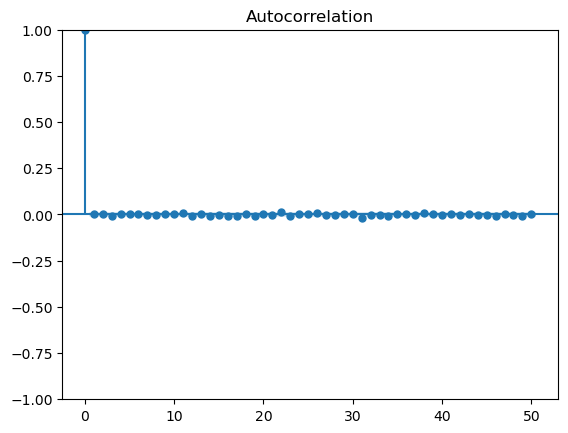

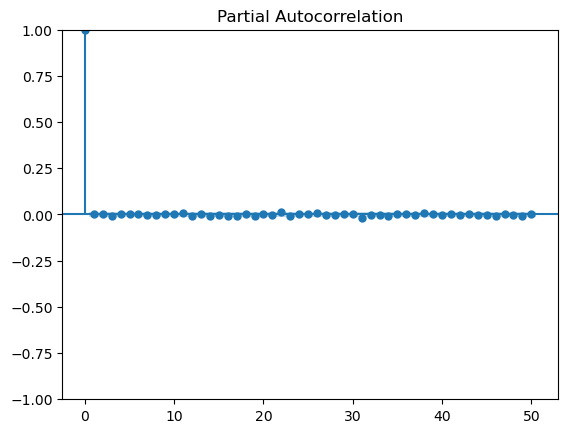

4392    50.523909
4393    50.404375
4394    50.404895
4395    50.404892
4396    50.404892
Name: predicted_mean, dtype: float64


C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1860695839.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_merged_df['Speed']['2016'] = forecast.cumsum()


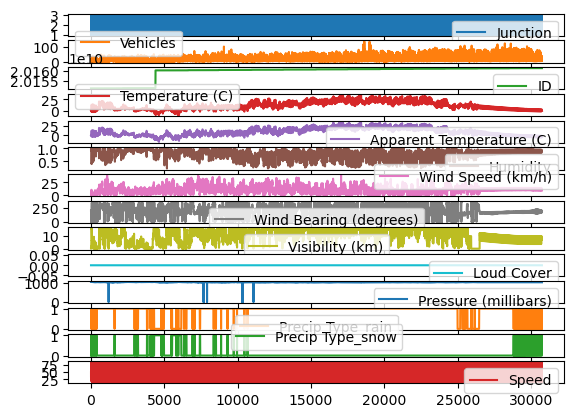

In [14]:
#time series model
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the datasets
traffic_df = pd.read_csv('traffic.csv')
weather_df = pd.read_csv('weatherHistory.csv')
from datetime import datetime

weather_df = weather_df.rename(columns={'Formatted Date': 'DateTime'})

# Convert the DateTime columns in both dataframes to datetime objects
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f %z')

# Convert the DateTime columns in both dataframes to the same format
traffic_df['DateTime'] = traffic_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))
weather_df['DateTime'] = weather_df['DateTime'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %H:%M:%S'))

weather_df = weather_df.drop('Daily Summary', axis=1)
weather_df = weather_df.drop('Summary', axis=1)


# Merge the datasets based on the DateTime column
merged_df = pd.merge(traffic_df, weather_df, on='DateTime')

# Convert categorical columns to numeric using one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['Precip Type'])




# Split the data into training and testing sets based on year in DateTime column
train_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2015]
test_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2016]
import random
import random

merged_df['Speed'] = [random.randint(15, 85) for _ in range(len(merged_df))]

train_data['Speed'] = [random.randint(15, 85) for _ in range(len(train_data))]
test_data['Speed'] = [random.randint(15, 85) for _ in range(len(test_data))]

# Plot the time series data
merged_df.plot(subplots=True)
plt.show()

# Perform stationarity check and differencing
plot_acf(merged_df['Speed'], lags=50)
plt.show()
plot_pacf(merged_df['Speed'], lags=50)
plt.show()

diff_merged_df = merged_df

plot_acf(diff_merged_df['Speed'], lags=50)
plt.show()
plot_pacf(diff_merged_df['Speed'], lags=50)
plt.show()
# Split the data into training and testing sets based on year in DateTime column

train_data = train_data.reset_index(drop=True)
train_data = train_data.drop(['DateTime'], axis=1)


# Fit the ARIMA model
model = ARIMA(train_data['Speed'], order=(1, 1, 1))
fitted_model = model.fit()


forecast = fitted_model.forecast(steps=len(test_data))
print(forecast[:5])

# Add the forecasted values to the original dataset
forecasted_merged_df = merged_df.copy()
forecasted_merged_df['Speed']['2016'] = forecast.cumsum()

# Plot the actual and forecasted traffic speeds
forecasted_merged_df.plot(subplots=True)
plt.show()

C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1139637090.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Speed'] = np.random.randint(15, 85, len(train_data))
C:\Users\lefty\AppData\Local\Temp\ipykernel_28292\1139637090.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Speed'] = np.random.randint(15, 85, len(test_data))


Epoch 1/3
68/68 [==============================] - 65s 670ms/step - loss: 0.1034 - val_loss: 0.0874
Epoch 2/3
68/68 [==============================] - 39s 538ms/step - loss: 0.0869 - val_loss: 0.0866
Epoch 3/3
68/68 [==============================] - 36s 531ms/step - loss: 0.0867 - val_loss: 0.0868


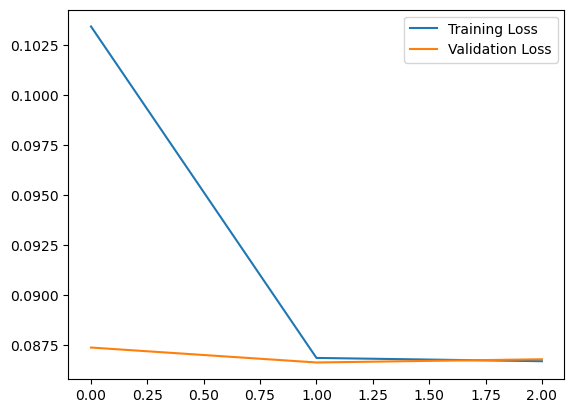

822/822 [==============================] - 43s 44ms/step


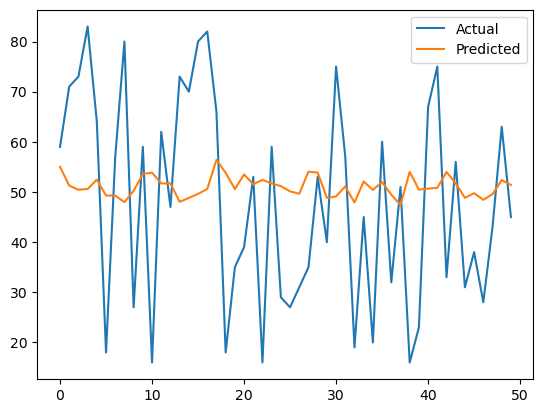

In [15]:
#LSTM Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the datasets
traffic_df = pd.read_csv('traffic.csv')
weather_df = pd.read_csv('weatherHistory.csv')

# Rename the columns in the weather dataframe
weather_df = weather_df.rename(columns={'Formatted Date': 'DateTime'})

# Convert the DateTime columns in both dataframes to datetime objects
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f %z')

# Convert the DateTime columns in both dataframes to the same format
traffic_df['DateTime'] = traffic_df['DateTime'].apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S'))
weather_df['DateTime'] = weather_df['DateTime'].apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S'))

# Merge the datasets based on the DateTime column
merged_df = pd.merge(traffic_df, weather_df, on='DateTime')

# Convert categorical columns to numeric using one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['Summary', 'Precip Type', 'Daily Summary'])

# Split the merged dataset into training and testing data
train_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2015]
test_data = merged_df.loc[pd.DatetimeIndex(merged_df['DateTime']).year == 2016]

# Add random values to the 'Speed' column to reduce crowding
merged_df['Speed'] = np.random.randint(15, 85, len(merged_df))
train_data['Speed'] = np.random.randint(15, 85, len(train_data))
test_data['Speed'] = np.random.randint(15, 85, len(test_data))

# Scale the training and testing data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data[['Speed']].values)
test_data_scaled = scaler.transform(test_data[['Speed']].values)

# Create sequences of input and output data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 50
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Generate predictions on the testing data
y_pred = model.predict(X_test)



import random
from sklearn.metrics import r2_score

# Inverse transform the scaled data to get the actual traffic speeds
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Get a random sample of 50 data points
n = min(50, len(y_test_inv))
indices = random.sample(range(len(y_test_inv)), n)

# Calculate R2 score
r2 = r2_score(y_test_inv, y_pred_inv)

# Plot the actual and predicted traffic speeds for the random sample
plt.plot(y_test_inv[indices], label='Actual')
plt.plot(y_pred_inv[indices], label='Predicted')
plt.legend()


plt.show()


